<div style="text-align: center;">
  <img width="240" height="240" src="https://www.naterscreations.com/imputegap/logo_imputegab.png" />
</div>
<h1>ImputeGAP: Tutorial</h1>
<h6>Notebook 4: Downstream</h6>





# 1.&nbsp;Installation


ImputeGAP is a comprehensive end-to-end imputation library that covers the whole imputation workflow, from data collection to explaining the results and their implications. It consists of two interconnected components: the imputation module and the advanced analysis module. These components can be used together through a standardized and configuration-based pipeline, or separately via independent instantiation. The documentation is available on: https://imputegap.readthedocs.io/.
This notebook showcases key steps of the imputation: imputation pipeline synthesis and advanced analysis. Before getting started, please make sure to install the library along with the required Jupyter dependencies:

In [ ]:
%pip install imputegap==1.1.1

In [ ]:
%pip install -U ipywidgets

In [ ]:
import pandas as pd
def imputegap_jupyter(matrix):
    df = pd.DataFrame(matrix).head(10).reset_index(drop=True)
    df.index += 1  # Start index at 1 instead of 0
    return df.style.format(precision=2)

In [1]:
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils
ts = TimeSeries()

# 7.&nbsp;Downstream Analysis


ImputeGAP includes a dedicated module for systematically evaluating the impact of data imputation on downstream tasks. Currently, forecasting is the primary supported task, with plans to expand to additional tasks in the future, such as classification and anomaly detection

All downstream models implemented in ImputeGAP are available in the `ts.forecasting_models` module and can be listed as follows:

In [49]:
ts.forecasting_models

['arima',
 'bats',
 'croston',
 'deepar',
 'ets',
 'exp-smoothing',
 'hw-add',
 'lightgbm',
 'lstm',
 'naive',
 'nbeats',
 'prophet',
 'sf-arima',
 'theta',
 'transformer',
 'unobs',
 'xgboost']

We show how ImputeGAP evaluates the downstream impact of CDRec in comparison to ZeroImpute (which fills missing values with zeros) on the DeepAR forecasting model.

In [ ]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the timeseries
ts.load_series(utils.search_path("forecast-economy"))
ts.normalize()

# contaminate the time series
ts_m = ts.Contamination.aligned(ts.data, rate_series=0.8)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "deepar", "baseline": "ZeroImpute"}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)

In [51]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (cdrec) :
MSE_original         = 1.0807805580020888
MSE_cdrec            = 1.2782453422004152
MSE_zeroimpute       = 1.2828082630287416
sMAPE_original       = 152.95966103560102
sMAPE_cdrec          = 143.16411667656757
sMAPE_zeroimpute     = 156.25662740745992


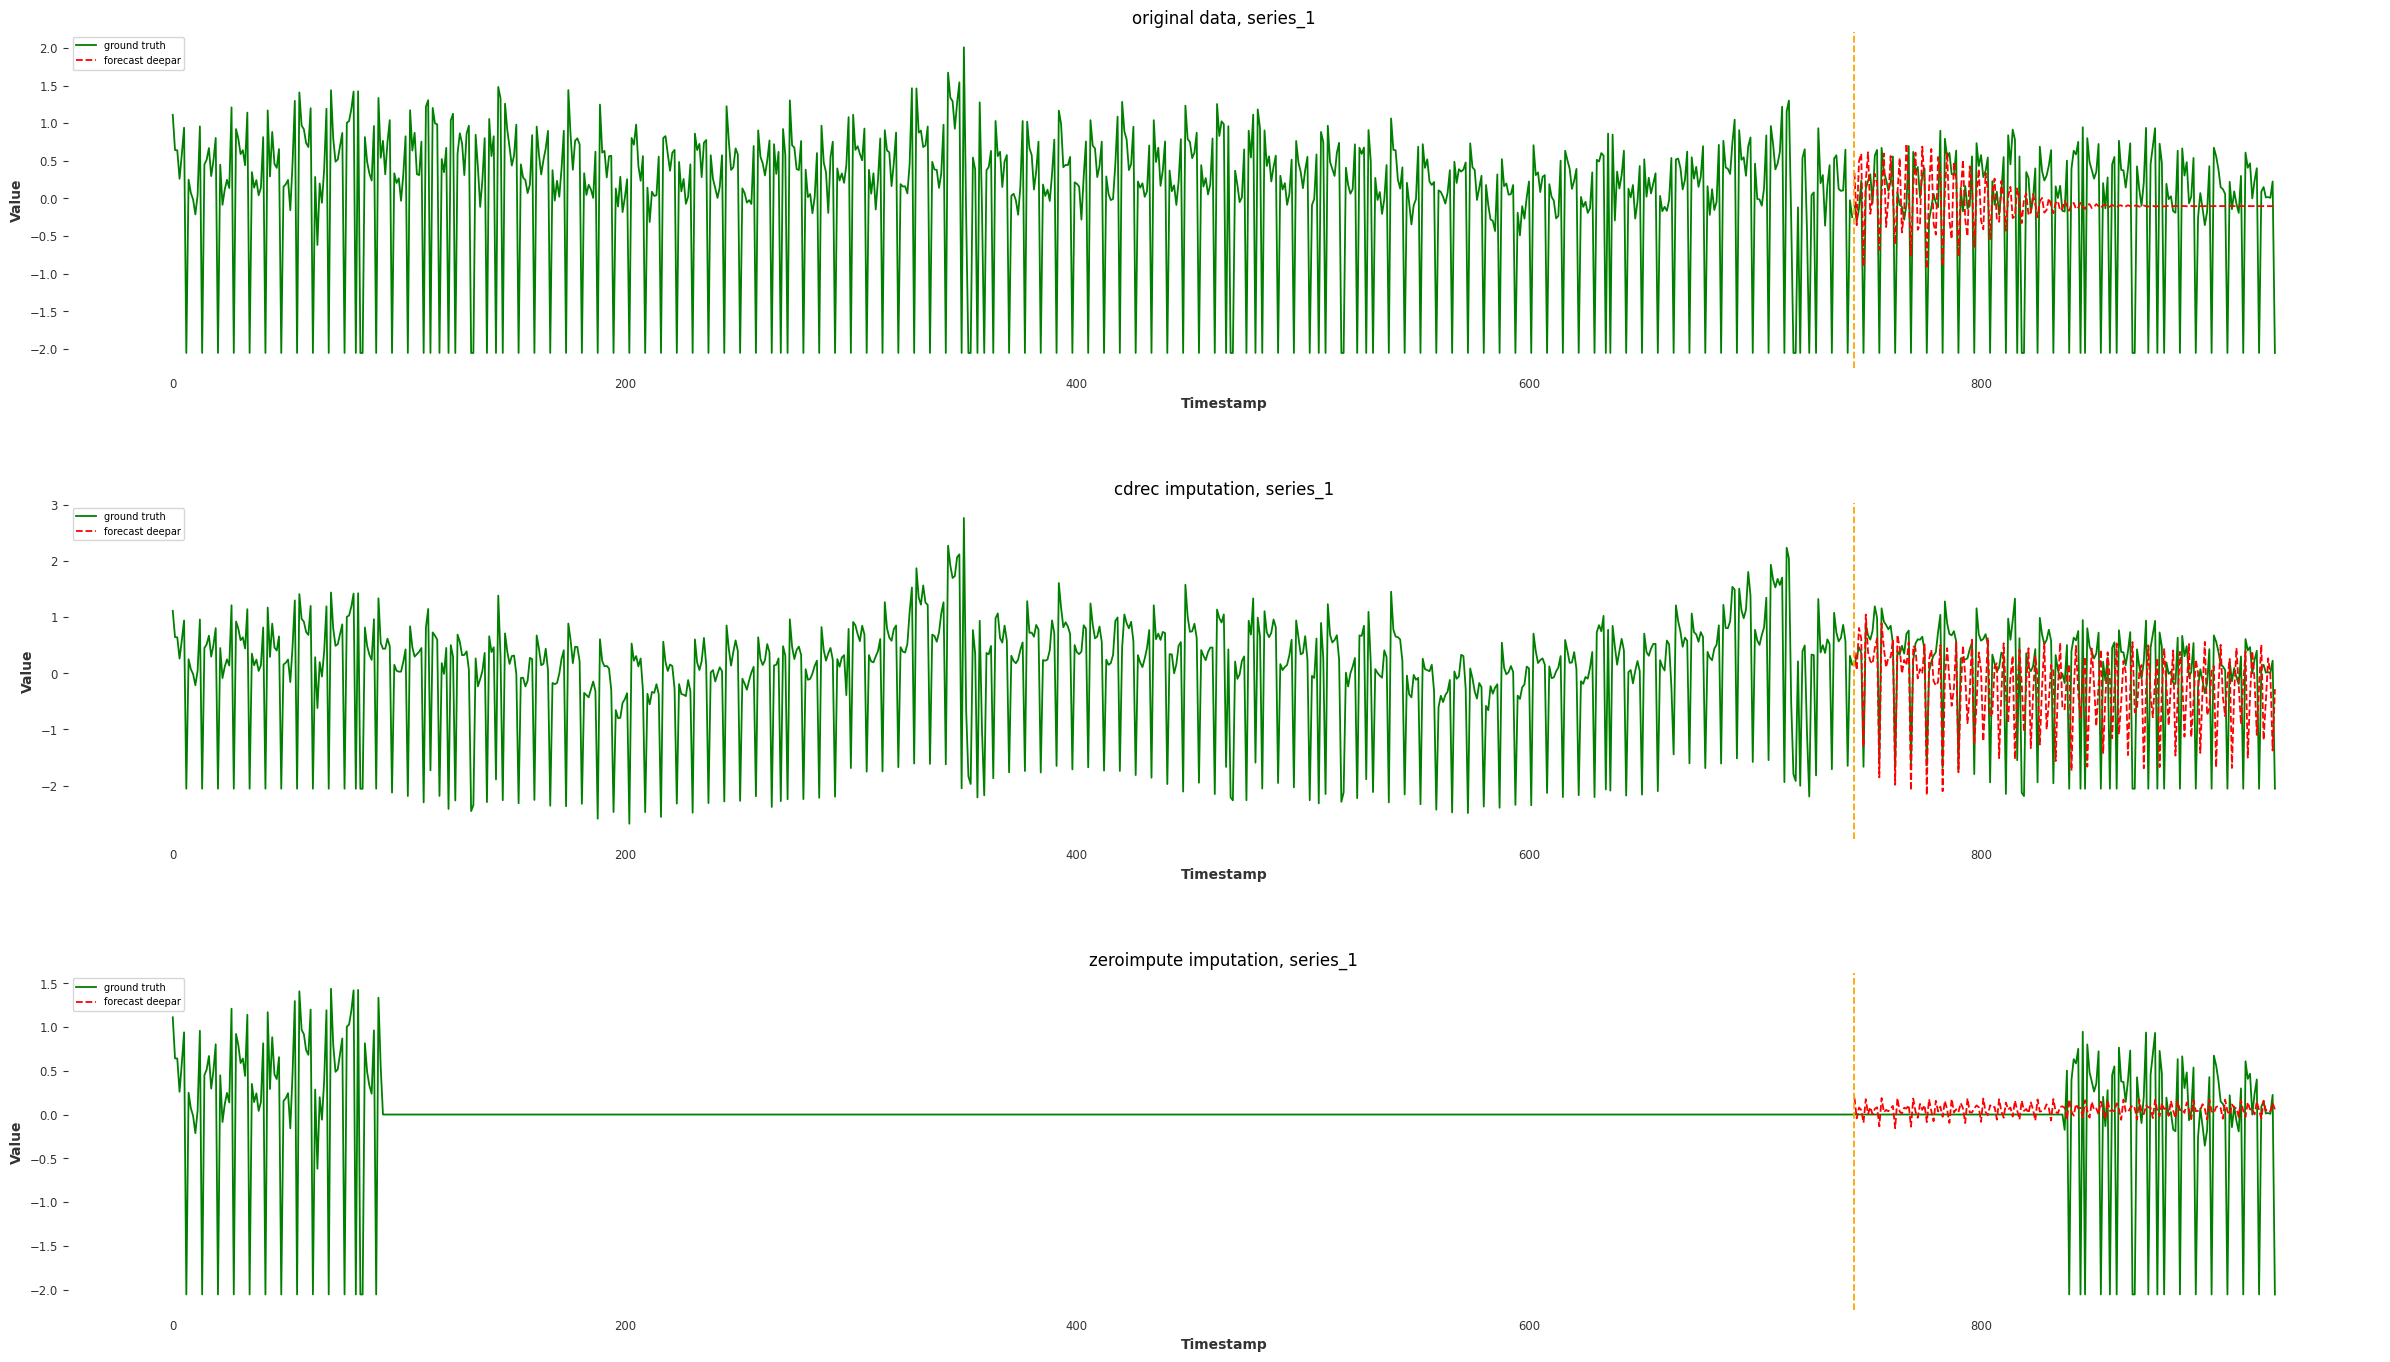

In [52]:
%matplotlib inline
imputer.downstream_plot.show()

Let's try a new forecaster

In [5]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the timeseries
ts.load_series(utils.search_path("forecast-economy"))
ts.normalize()

# contaminate the time series
ts_m = ts.Contamination.aligned(ts.data, rate_series=0.8)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.CDRec(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "lightgbm", "baseline": "ZeroImpute"}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/forecast-economy.txt

> logs: normalization (z_score) of the data - runtime: 0.0006 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 80.0%
	security offset: [0-93]
	index impacted : 93 -> 837

(IMPUTATION) CDRec
	Matrix: 16, 931
	truncation rank: 3
	epsilon: 1e-06
	iterations: 100

> logs: imputation cdrec - Execution Time: 5.5809 seconds.

(DOWNSTREAM) Default parameters of the downstream model loaded.

(DOWNSTREAM) Analysis launched !
task: forecast
model: lightgbm
params: {'lags': 7, 'verbose': -1}
base algorithm: cdrec
reference algorithm: zeroimpute

plots saved in:  ./imputegap_assets/downstream

Results (cdrec) :
MSE_original         = 0.4947244252800246
MSE_cdrec            = 1.2413342743498377
MSE_zeroimpute       = 0.6746554226571995
sMAPE_original       = 94.60630983101325
sMAPE_cdrec          = 

In [6]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (cdrec) :
MSE_original         = 0.4947244252800246
MSE_cdrec            = 1.2413342743498377
MSE_zeroimpute       = 0.6746554226571995
sMAPE_original       = 94.60630983101325
sMAPE_cdrec          = 120.87551336113879
sMAPE_zeroimpute     = 114.63108036955992


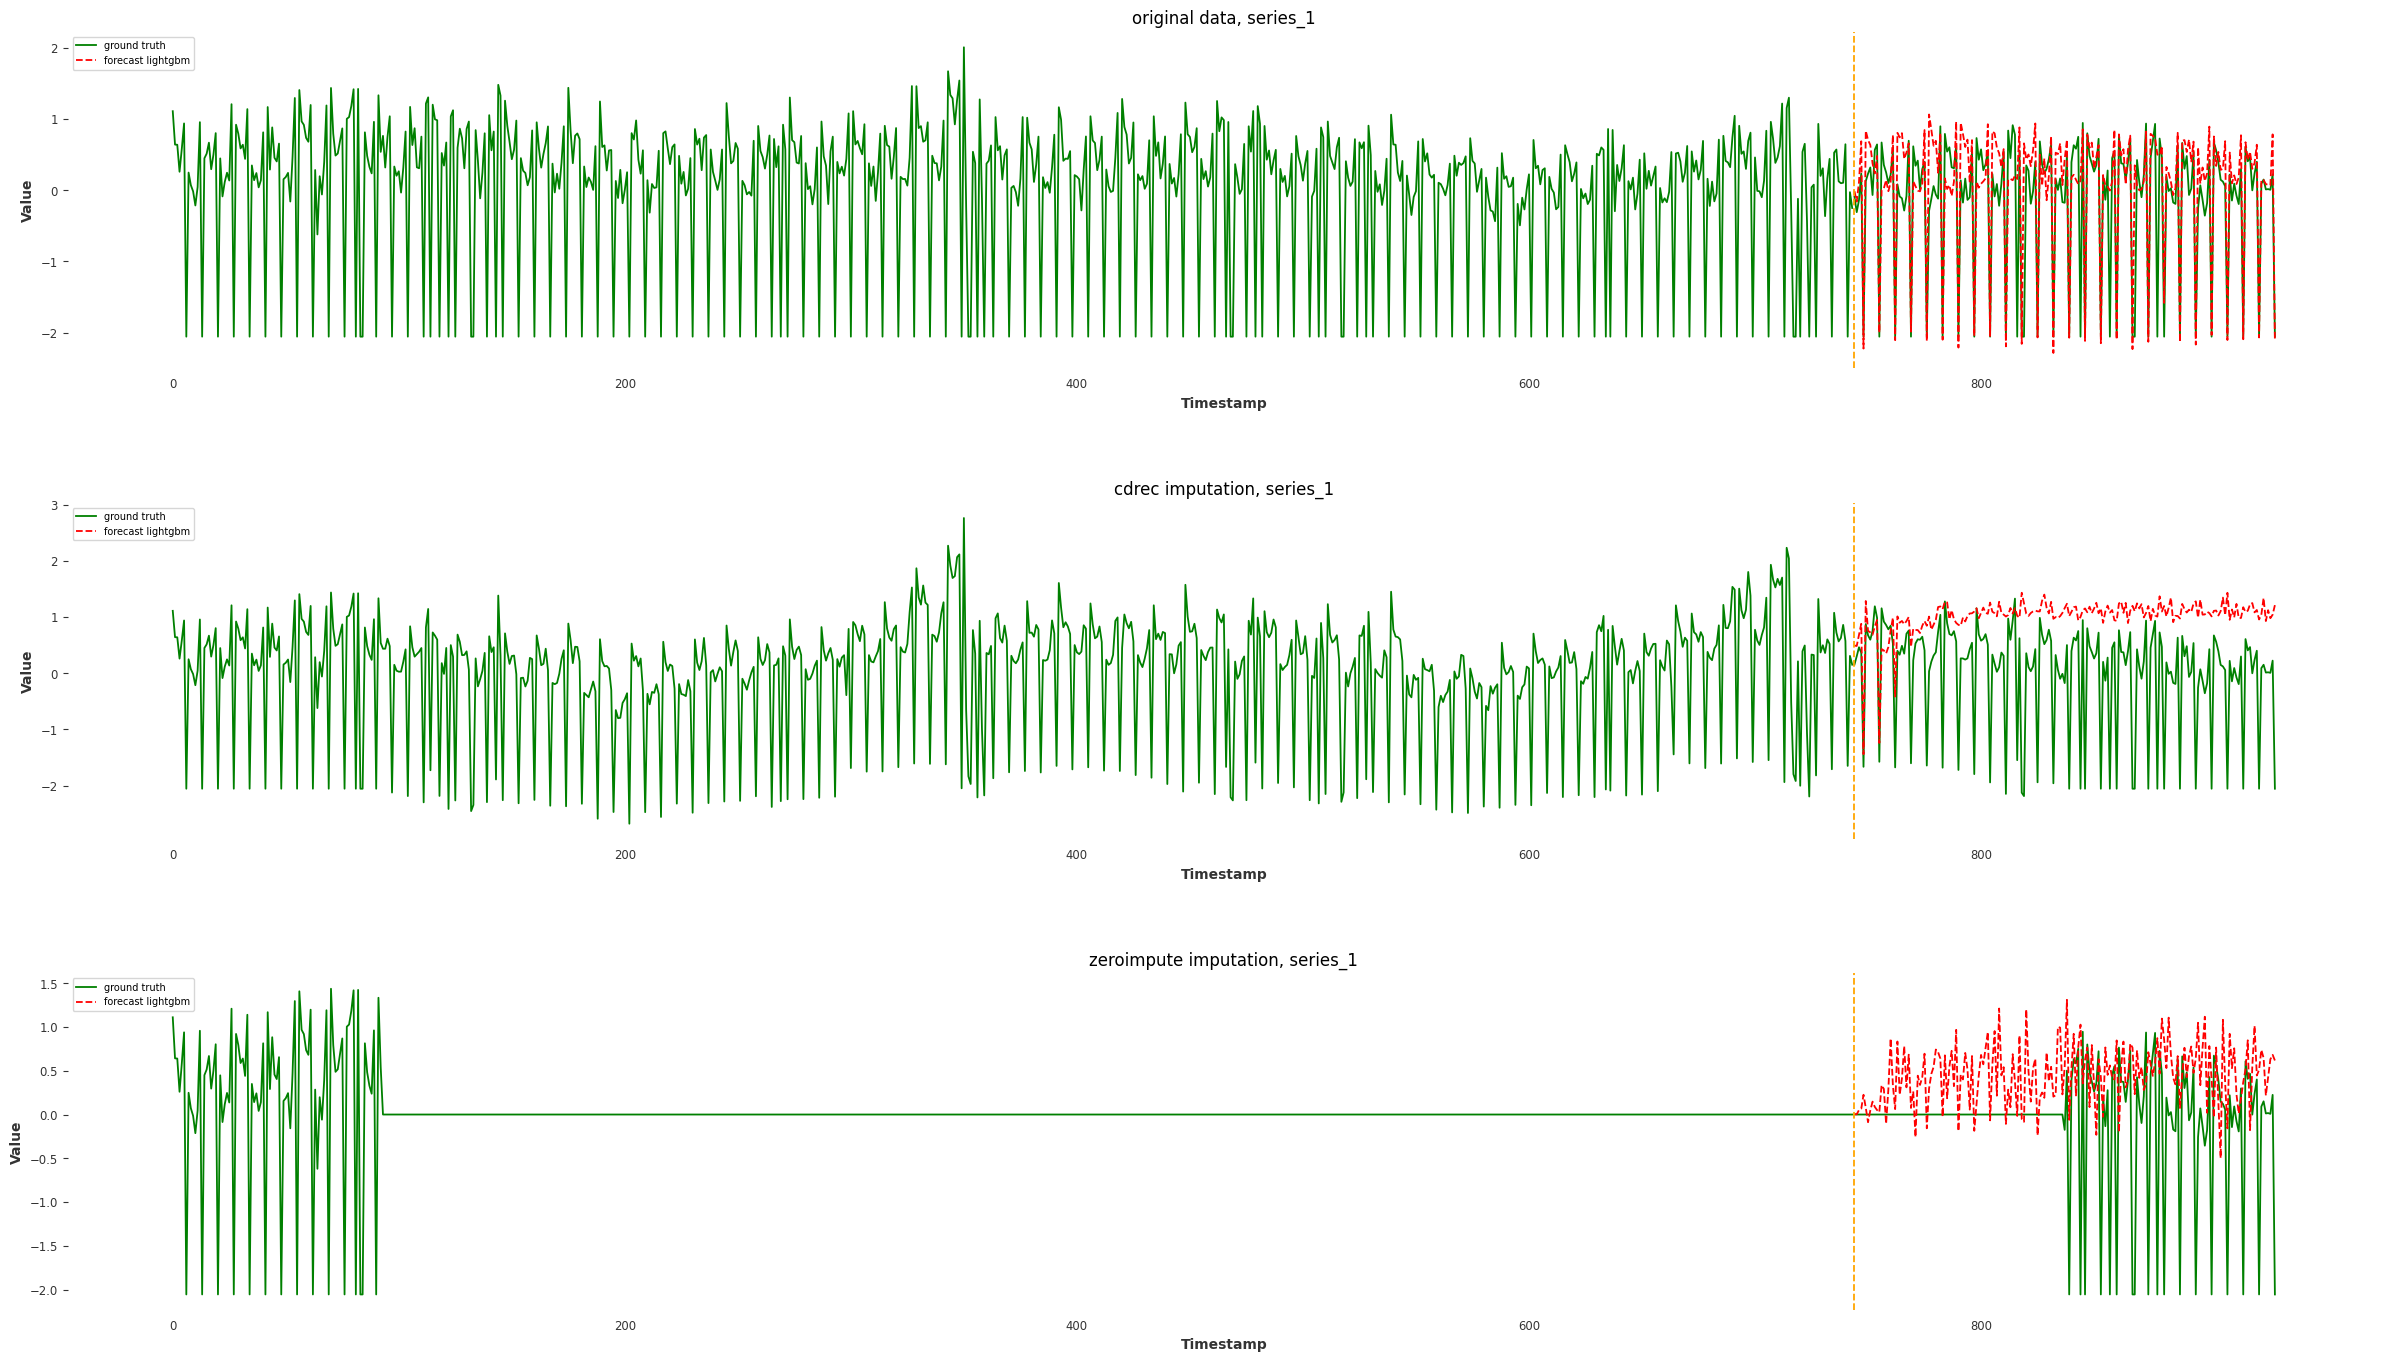

In [7]:
%matplotlib inline
imputer.downstream_plot.show()

Let's compare 2 Matri Completion algorithms

In [11]:
from imputegap.recovery.imputation import Imputation
from imputegap.recovery.manager import TimeSeries
from imputegap.tools import utils

# initialize the time series object
ts = TimeSeries()

# load and normalize the timeseries
ts.load_series(utils.search_path("forecast-economy"))
ts.normalize()

# contaminate the time series
ts_m = ts.Contamination.aligned(ts.data, rate_series=0.8)

# define and impute the contaminated series
imputer = Imputation.MatrixCompletion.IterativeSVD(ts_m)
imputer.impute()

# compute and print the downstream results
downstream_config = {"task": "forecast", "model": "lightgbm", "baseline": "SoftImpute"}
imputer.score(ts.data, imputer.recov_data, downstream=downstream_config)
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


(SYS) The dataset is loaded from /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/datasets/forecast-economy.txt

> logs: normalization (z_score) of the data - runtime: 0.0004 seconds

(CONT) missigness pattern: ALIGNED
	percentage of contaminated series: 20.0%
	rate of missing data per series: 80.0%
	security offset: [0-93]
	index impacted : 93 -> 837

(SYS) Inner files loaded :  /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/env/default_values.toml 


(SYS) Wrapper files loaded for C++ :  /mnt/c/Users/nquen/switchdrive/MST_MasterThesis/imputegap/imputegap/algorithms/lib/lib_iterative_svd.so 

		(C++) Iterative-SVD: Matrix Shape: (16, 931) for Rank 3...

> logs: imputation iterative svd - Execution Time: 0.0203 seconds


(DOWNSTREAM) Default parameters of the downstream model loaded.

(DOWNSTREAM) Analysis launched !
task: forecast
model: lightgbm
params: {'lags': 7, 'verbose': -1}
base algorithm: iterative_svd
reference algorithm: softimpute




In [12]:
ts.print_results(imputer.downstream_metrics, algorithm=imputer.algorithm)


Results (iterative_svd) :
MSE_original         = 0.4947244252800246
MSE_iterative_svd    = 1.048395157135267
MSE_softimpute       = 0.4659155552463006
sMAPE_original       = 94.60630983101325
sMAPE_iterative_svd  = 112.28652185598543
sMAPE_softimpute     = 93.94753980031828


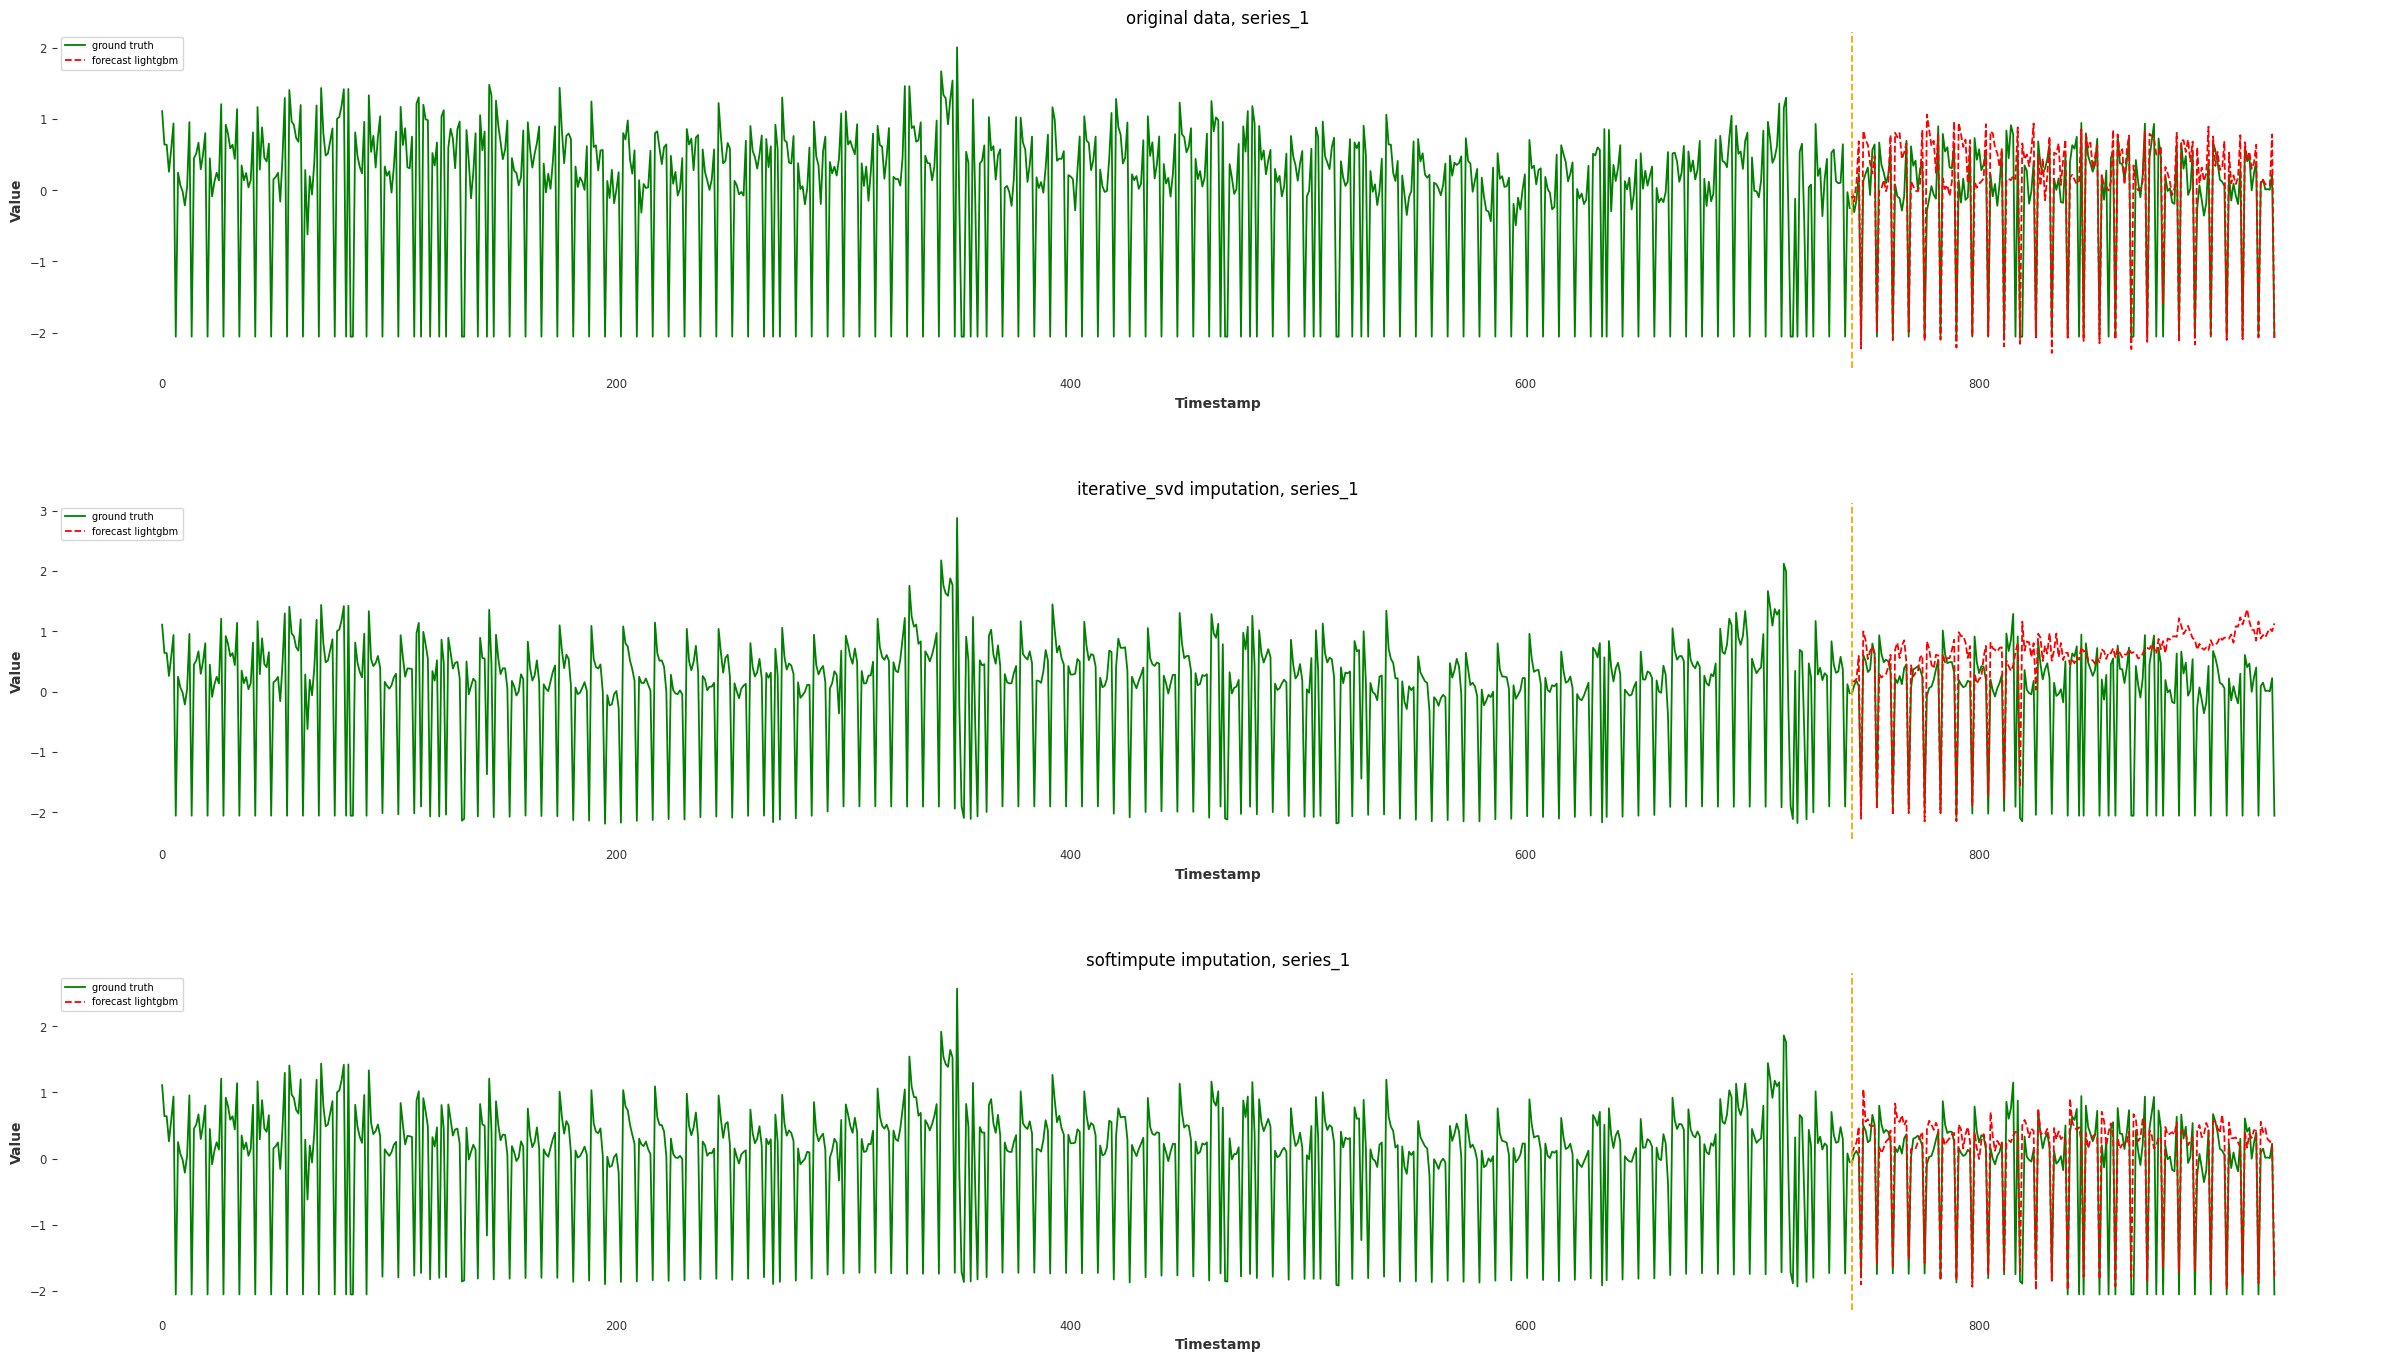

In [13]:
%matplotlib inline
imputer.downstream_plot.show()

<br>

More KDD tutorials: https://imputegap-tutorials.github.io/KDD-2025/html/slides_codes.html

<br>
